In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D
import math
import time
import pandas
import astroML
from astroML.correlation import bootstrap_two_point_angular
from astroML.correlation import bootstrap_two_point

Usaremos el estimador de 2PCF de Landy y Szalay

In [2]:
data = np.load('prueba_10k.npy')   
data2 = np.load('prueba_20k.npy')  
data3 = np.load('prueba_50k.npy')  
data4 = np.load('prueba_250k.npy')  

                                                       
x=data2[:,0]
y=data2[:,1]
z=data2[:,2]

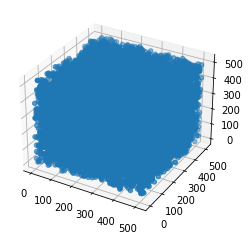

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)
plt.show()

In [4]:
# medidas del cubo
maxim = [max(x),max(y),max(z)]
Lado = math.ceil(max(maxim))
Num = 5000
Dim = 3

#generamos dos arreglos aleatorios de 0 a Lado y con Num puntos, además de dimension Dim
rand_a = np.zeros((Num,Dim))
rand_b = np.zeros((Num,Dim))

for i in range(Num):
    rand_a[i] = np.random.uniform(0,Lado,Dim)
    rand_b[i] = np.random.uniform(0,Lado,Dim)    

In [5]:
Num_R = 1000
Dim_R = 3
Lado = math.ceil(max(maxim))
rand_b = np.zeros((Num_R,Dim_R))

for i in range(Num_R):
    rand_b[i] = np.random.uniform(0,Lado,Dim_R)    

In [6]:

def corr3(a,b,N_bins,maxrange):
    Dist_tot = []
    n1=0
    n2=0
    n3=0
    n_DD = 0
    n_RR = 0
    n_DR = 0
    cero = 0
    Bins = np.linspace(0,maxrange,N_bins)
    for i in range(3):
    
        # distancias del arreglo 'a' al mismo
        if i == 0:
                for j in a:
                    Dist = j-a[cero:]
                    Dist_ab = np.linalg.norm(Dist,axis=1)
                    Dist_tot.extend(Dist_ab[Dist_ab!=0])
                    
                
                DD,b1 = np.histogram(Dist_tot, bins=Bins)
                n_D = len(Dist_tot)
                Dist_tot = []
                
        # distancias del arreglo 'b' al mismo                
        elif i == 1:
                for j in b:
                    Dist = j-b[cero:]
                    Dist_ab = np.linalg.norm(Dist,axis=1)
                    Dist_tot.extend(Dist_ab[Dist_ab!=0])
                    
                
                RR,b2 = np.histogram(Dist_tot, bins=Bins)
                n_R = len(Dist_tot)
                Dist_tot = []

        # distancias del arreglo 'a' al arreglo 'b'
        elif i == 2:
                for j in a:
                    Dist = j-b
                    Dist_ab = np.linalg.norm(Dist,axis=1)
                    Dist_tot.extend(Dist_ab)
                    
                
                DR,b3 = np.histogram(Dist_tot, bins=Bins)
                n_DR = len(Dist_tot)
                Dist_tot = []
                
    Xi = DD*n_R /  (n_D*RR)   - 2*DR*n_R/(n_DR*RR) + 1

    return b3[:N_bins-1],Xi 

In [12]:
start = time.time()

N_bins = 10
maxrange = Lado*np.sqrt(Dim)
Bins,xi = corr3(data,rand_b,N_bins,maxrange)

end = time.time()
print(end - start)

67.78388404846191


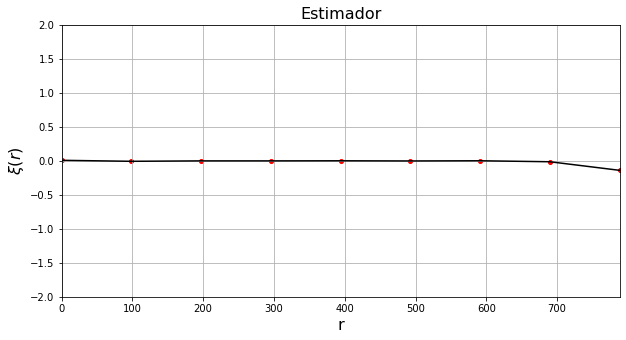

In [77]:

fig = plt.figure(figsize=(10,5))
plt.scatter(Bins,xi, s=16, c='red')
plt.plot(Bins,xi,'k-')
plt.xlim(np.min(Bins),np.max(Bins))
plt.ylim(-2,2)
plt.xlabel('r',fontsize=16)
plt.ylabel('$\u03BE(r)$',fontsize=16)
plt.title('Estimador',fontsize=16)
plt.grid();

In [23]:


start = time.time()



N_bins = 10
maxrange = Lado*np.sqrt(Dim)
Bins,xi = corr3(data2,rand_b,N_bins,maxrange)

end = time.time()
print(end - start)

71.12119793891907


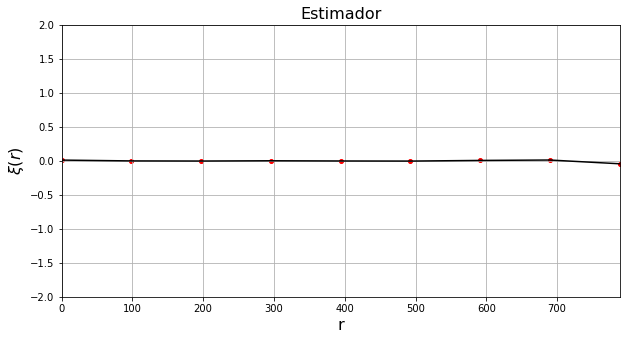

In [73]:

fig = plt.figure(figsize=(10,5))
plt.scatter(Bins,xi, s=16, c='red')
plt.plot(Bins,xi,'k-')
plt.xlim(np.min(Bins),np.max(Bins))
plt.ylim(-2,2)
plt.xlabel('r',fontsize=16)
plt.ylabel('$\u03BE(r)$',fontsize=16)
plt.title('Estimador',fontsize=16)
plt.grid();

In [10]:
import astroML
N_bins = 10
maxrange = Lado*np.sqrt(Dim)
Bins = np.linspace(0,maxrange,N_bins)
start = time.time()
corr = astroML.correlation.two_point(data, Bins, method='standard', data_R=None, random_state=None)
end = time.time()
print(end - start)

11.850711584091187


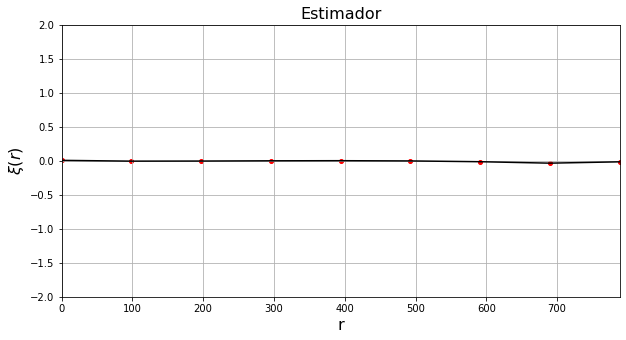

In [19]:
bn = Bins[:N_bins-1]
fig = plt.figure(figsize=(10,5))
plt.scatter(bn,corr, s=16, c='red')
plt.plot(bn,corr,'k-')
plt.xlim(np.min(bn),np.max(bn))
plt.ylim(-2,2)
plt.xlabel('r',fontsize=16)
plt.ylabel('$\u03BE(r)$',fontsize=16)
plt.title('Estimador',fontsize=16)
plt.grid();

In [11]:
N_bins = 10
maxrange = Lado*np.sqrt(Dim)
Bins = np.linspace(0,maxrange,N_bins)
start = time.time()
correlacion = astroML.correlation.two_point(data4, Bins, method='standard', data_R=None, random_state=None)
end = time.time()
print(end - start)

6920.895636558533


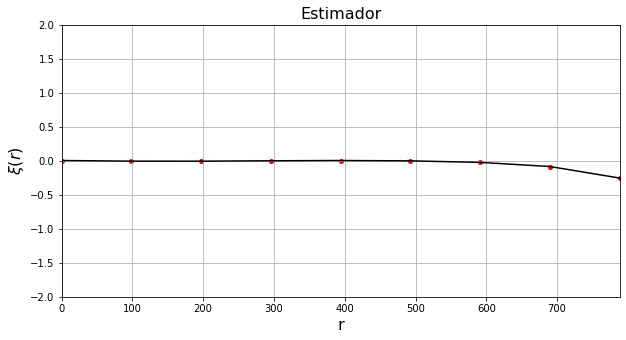

In [12]:
bn = Bins[:N_bins-1]
fig = plt.figure(figsize=(10,5))
plt.scatter(bn,correlacion, s=16, c='red')
plt.plot(bn,correlacion,'k-')
plt.xlim(np.min(bn),np.max(bn))
plt.ylim(-2,2)
plt.xlabel('r',fontsize=16)
plt.ylabel('$\u03BE(r)$',fontsize=16)
plt.title('Estimador',fontsize=16)
plt.grid();

In [22]:
data5 = np.load('example_128_z0p000.0')   

ValueError: Cannot load file containing pickled data when allow_pickle=False